In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sb


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-play-store-apps/googleplaystore.csv
/kaggle/input/google-play-store-apps/license.txt
/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv


In [2]:
## import datasets
gapps_data= pd.read_csv('../input/google-play-store-apps/googleplaystore.csv')



In [3]:
gapps_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### Data Cleaning

In [4]:
### remove NAN data from gapps_data 
gapps_data.dropna(axis=0,inplace=True)
print(f'The shape of data is {gapps_data.shape}')

The shape of data is (9360, 13)


### Data Cleaning and Engineering 

In [5]:
#### convert size in data to MB
gapps_data_MB= gapps_data[gapps_data['Size'].str.contains('M')]
gapps_data_KB= gapps_data[gapps_data['Size'].str.contains('k')]
gapps_data_VWD= gapps_data[gapps_data['Size']=='Varies with device']
gapps_data_MB['Size']=gapps_data_MB['Size'].str.replace('M','')
gapps_data_KB['Size']=gapps_data_KB['Size'].str.replace('k','')
gapps_data_VWD['Size']= [-1 for i in range(0,gapps_data_VWD.shape[0])]   ### put -1  as size for Varies with device
gapps_data_KB['Size']=gapps_data_KB['Size'].apply(lambda x:str(float(x)/1000)) ### convert KB to MB
gapps_data= pd.concat([gapps_data_MB,gapps_data_KB,gapps_data_VWD],axis=0)

#### removing the + string in Installs columns and renaming the column accordingly
gapps_data['Installs']= gapps_data['Installs'].str.replace('\+','')
gapps_data['Installs']= gapps_data['Installs'].str.replace('\,','')
gapps_data['Price']= gapps_data['Price'].str.replace('\$','')
gapps_data['Price']= gapps_data['Price'].astype('float')
gapps_data.columns=['App', 'Category', 'Rating', 'Reviews', 'Size (in MB)', 'Installs (More than or equal to)', 'Type','Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver','Android Ver']


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [6]:
### since current version does not have a impact on our study, let's drop it as well
gapps_data.drop('Current Ver',axis=1,inplace=True)

In [7]:
##dropping the duplicates from the data as well
gapps_data.drop_duplicates(inplace=True)

In [8]:
gapps_data.head()

,App,Category,Rating,Reviews,Size (in MB),Installs (More than or equal to),Type,Price,Content Rating,Genres,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",4.4 and up


In [9]:
### let's work on conversion of dates (Last Updated column)
gapps_data['Last Updated']= pd.to_datetime(gapps_data['Last Updated'])
gapps_data.head()

,App,Category,Rating,Reviews,Size (in MB),Installs (More than or equal to),Type,Price,Content Rating,Genres,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,2018-01-07,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0.0,Teen,Art & Design,2018-06-08,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,4.4 and up


In [10]:
#extract the year from the last updated date, as it serves a important feature for us for the analysis

gapps_data['Last Updated Year']= gapps_data['Last Updated'].dt.year

#removing the last updated date column as it had no function as we had extracted the year from it
gapps_data.drop('Last Updated',axis=1,inplace=True)
gapps_data.head()

,App,Category,Rating,Reviews,Size (in MB),Installs (More than or equal to),Type,Price,Content Rating,Genres,Android Ver,Last Updated Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,4.0.3 and up,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,4.0.3 and up,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,4.0.3 and up,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0.0,Teen,Art & Design,4.2 and up,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,4.4 and up,2018


In [11]:
#change the datatype accordingly
gapps_data['Installs (More than or equal to)']=gapps_data['Installs (More than or equal to)'].astype('int')


### Exploratory Data Analysis

In [12]:
#### calculate the total downloads per category

sum_installs= gapps_data['Installs (More than or equal to)'].sum()

category_installs= gapps_data.groupby('Category').aggregate({'Installs (More than or equal to)':'sum'})
category_installs['Category_Name']= category_installs.index
category_installs.index=[i for i in range(1,category_installs.shape[0]+1)]
category_installs['% of installs']= (category_installs['Installs (More than or equal to)']*100)/sum_installs




In [13]:
category_installs

,Installs (More than or equal to),Category_Name,% of installs
1,124228100,ART_AND_DESIGN,0.084725
2,53129800,AUTO_AND_VEHICLES,0.036235
3,26916200,BEAUTY,0.018357
4,1916291655,BOOKS_AND_REFERENCE,1.306939
5,863518120,BUSINESS,0.588932
6,56036100,COMICS,0.038217
7,24152241530,COMMUNICATION,16.472186
8,206522410,DATING,0.140851
9,533852000,EDUCATION,0.364095
10,2455660000,ENTERTAINMENT,1.674796


In [14]:
def func(pct):
  return "{:1.1f}%".format(pct)

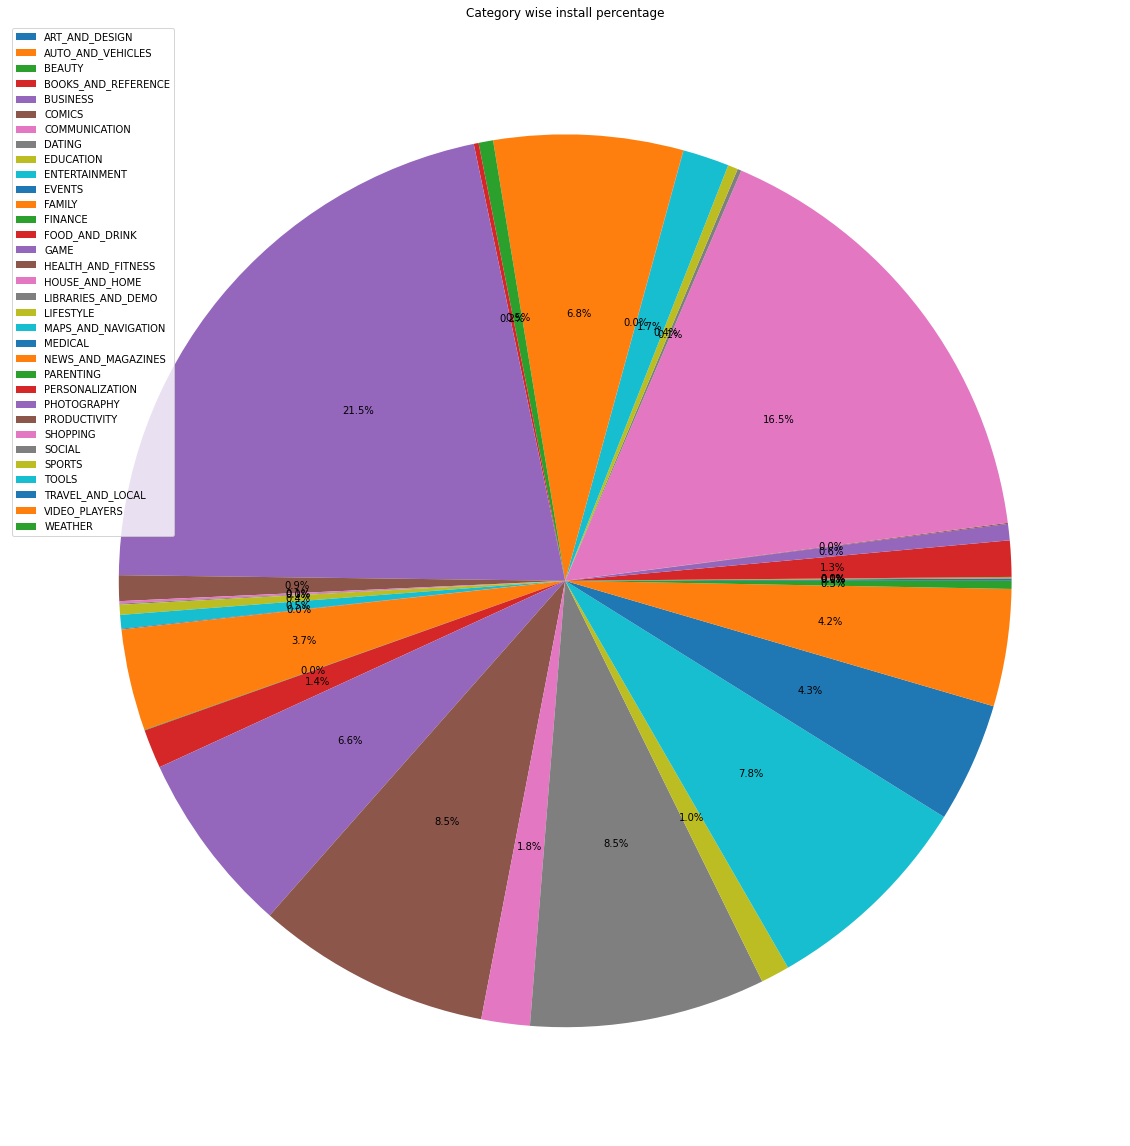

In [15]:
plt.figure(figsize=(20,30))
plt.title('Category wise install percentage')
plt.pie(category_installs['% of installs'],autopct=lambda pct: func(pct))
plt.legend(category_installs['Category_Name'])
plt.show()


**From the study i could see most downloads are made for Games category followed by Communication,Productivity, Social**

In [16]:
#### let's make our study on games category 

gapp_games= gapps_data[gapps_data['Category']=='GAME']

### let's do a pie chart approach to see which generes people plays most
gapp_game_genre= gapp_games.groupby('Genres').aggregate({'Installs (More than or equal to)':'sum'})
install_sum= gapp_games['Installs (More than or equal to)'].sum()
gapp_game_genre['Genre']= gapp_game_genre.index
gapp_game_genre['% of install']= (gapp_game_genre['Installs (More than or equal to)']*100)/install_sum
gapp_game_genre.index= [i for i in range(1,gapp_game_genre.shape[0]+1)]
gapp_game_genre


,Installs (More than or equal to),Genre,% of install
1,8336037470,Action,26.426813
2,25000000,Action;Action & Adventure,0.079255
3,406695300,Adventure,1.289301
4,500000000,Adventure;Action & Adventure,1.585094
5,9717077727,Arcade,30.804971
6,167127000,Board,0.529824
7,162824500,Card,0.516184
8,130260100,Casino,0.412949
9,5949000000,Casual,18.859453
10,100000000,Casual;Action & Adventure,0.317019


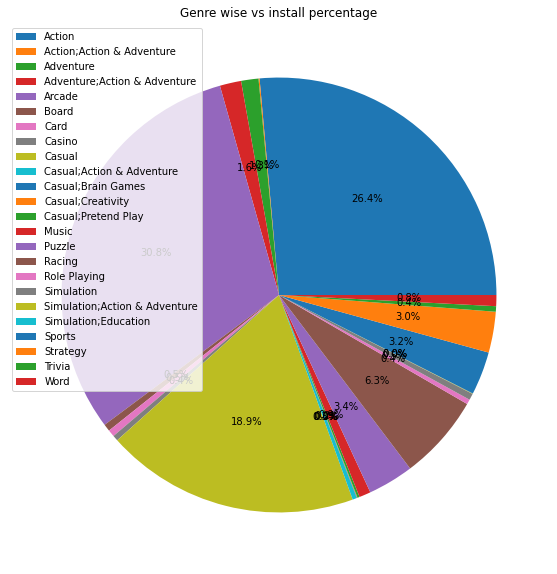

In [17]:
plt.figure(figsize=(20,10))
plt.title('Genre wise vs install percentage')
plt.pie(gapp_game_genre['% of install'],autopct=lambda pct: func(pct))
plt.legend(gapp_game_genre['Genre'])
plt.show()

### From this graph we can conclude that 

1. More Games being installed comes under Arcade genere (30.6%)

2. Next Genre is Action Genre (26%)

3. Next is Casual which accounts for 19% of total installs.

This gives us an idea like the type of games people like the most, more like we are being downloaded...........

In [18]:
#### study the percentage of category of people playing games

cate_people=gapp_games.groupby('Content Rating').aggregate({'Installs (More than or equal to)':'sum'})

cate_people['Category of People']= cate_people.index
cate_people.index=[i for i in range(1,cate_people.shape[0]+1)]
cate_people['% of installs']= (cate_people['Installs (More than or equal to)']*100)/install_sum



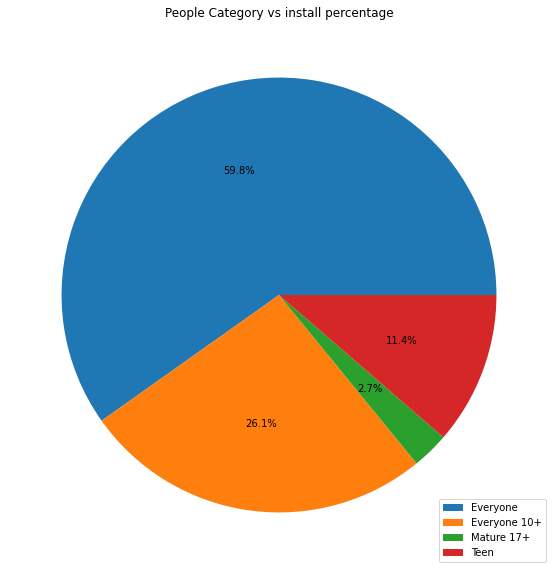

In [19]:
plt.figure(figsize=(10,10))
plt.title('People Category vs install percentage')
plt.pie(cate_people['% of installs'],autopct=lambda pct: func(pct))
plt.legend(cate_people['Category of People'])
plt.show()

#### from this analysis from above pie chart , i could say mostly people in age category of less or equal to 17 plays games more than others

In [20]:
#### let's do the analysis for communication category

gapp_communication= gapps_data[gapps_data['Category']=='COMMUNICATION']
genre_sum_communication= gapp_communication['Installs (More than or equal to)'].sum()
gapp_install_genre= gapp_communication.groupby('Content Rating').aggregate({'Installs (More than or equal to)':'sum'})
gapp_install_genre['Category of People']= gapp_install_genre.index
gapp_install_genre.index=[i for i in range(1,gapp_install_genre.shape[0]+1)]
gapp_install_genre['% of installs']= (gapp_install_genre['Installs (More than or equal to)']*100)/genre_sum_communication
gapp_install_genre


,Installs (More than or equal to),Category of People,% of installs
1,22137516220,Everyone,91.658226
2,380110000,Mature 17+,1.573808
3,1634615310,Teen,6.767965


#### This table gives us an idea that every Age group almost use the communication category.

In [21]:
### study with respect to productivity
gapp_productivity= gapps_data[gapps_data['Category']=='PRODUCTIVITY']
genre_sum_communication= gapp_productivity['Installs (More than or equal to)'].sum()
gapp_install_genre= gapp_productivity.groupby('Content Rating').aggregate({'Installs (More than or equal to)':'sum'})
gapp_install_genre['Category of People']= gapp_install_genre.index
gapp_install_genre.index=[i for i in range(1,gapp_install_genre.shape[0]+1)]
gapp_install_genre['% of installs']= (gapp_install_genre['Installs (More than or equal to)']*100)/genre_sum_communication
gapp_install_genre

,Installs (More than or equal to),Category of People,% of installs
1,12453063180,Everyone,99.919707
2,5000,Everyone 10+,0.000040
3,1000,Mature 17+,0.000008
4,10001000,Teen,0.080245


#### simmilar to what we had seen for communication, we could see every age group installs the productivity category apps

#### study with respect to free/price apps

In [22]:
paid_installs= gapps_data.groupby('Type').aggregate({'Installs (More than or equal to)':'sum'})
paid_installs['Type']= paid_installs.index
paid_installs['Install in %']= (paid_installs['Installs (More than or equal to)']*100)/sum_installs
paid_installs.index=[1,2]
paid_installs

,Installs (More than or equal to),Type,Install in %
1,146555223856,Free,99.952831
2,69161482,Paid,0.047169


#### here i could see that most install is for free type rather than paid type
#### so let's try to focus why paid apps had less installs through which it gives an insight of which category/ genres of app got good sales (sales = installs* price of each app)

In [23]:
gapp_paidapps= gapps_data[gapps_data['Type']=='Paid']

### calculating the total sales of each app by multiplying the number of installs and price of each app (it gives an approx min value)
gapp_paidapps['Total Sales']= gapp_paidapps['Installs (More than or equal to)']*gapp_paidapps['Price']
gapp_paidapps

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,App,Category,Rating,Reviews,Size (in MB),Installs (More than or equal to),Type,Price,Content Rating,Genres,Android Ver,Last Updated Year,Total Sales
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,4.99,Everyone,Business,4.0 and up,2018,499000.0
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39,100000,Paid,4.99,Everyone,Business,3.0 and up,2017,499000.0
477,Calculator,DATING,2.6,57,6.2,1000,Paid,6.99,Everyone,Dating,4.0 and up,2017,6990.0
481,AMBW Dating App: Asian Men Black Women Interra...,DATING,3.5,2,17,100,Paid,7.99,Mature 17+,Dating,4.0 and up,2017,799.0
851,Sago Mini Hat Maker,EDUCATION,4.9,11,63,1000,Paid,3.99,Everyone,Education;Pretend Play,4.0.3 and up,2017,3990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9941,Tasker,TOOLS,4.6,43045,-1,1000000,Paid,2.99,Everyone,Tools,Varies with device,2018,2990000.0
10037,XE Currency Pro,TRAVEL_AND_LOCAL,4.4,1090,-1,10000,Paid,1.99,Everyone,Travel & Local,Varies with device,2018,19900.0
10453,"Talkie Pro - Wi-Fi Calling, Chats, File Sharing",COMMUNICATION,4.5,201,-1,1000,Paid,2.99,Everyone,Communication,Varies with device,2018,2990.0
10645,Football Manager Mobile 2018,SPORTS,3.9,11460,-1,100000,Paid,8.99,Everyone,Sports,4.1 and up,2018,899000.0


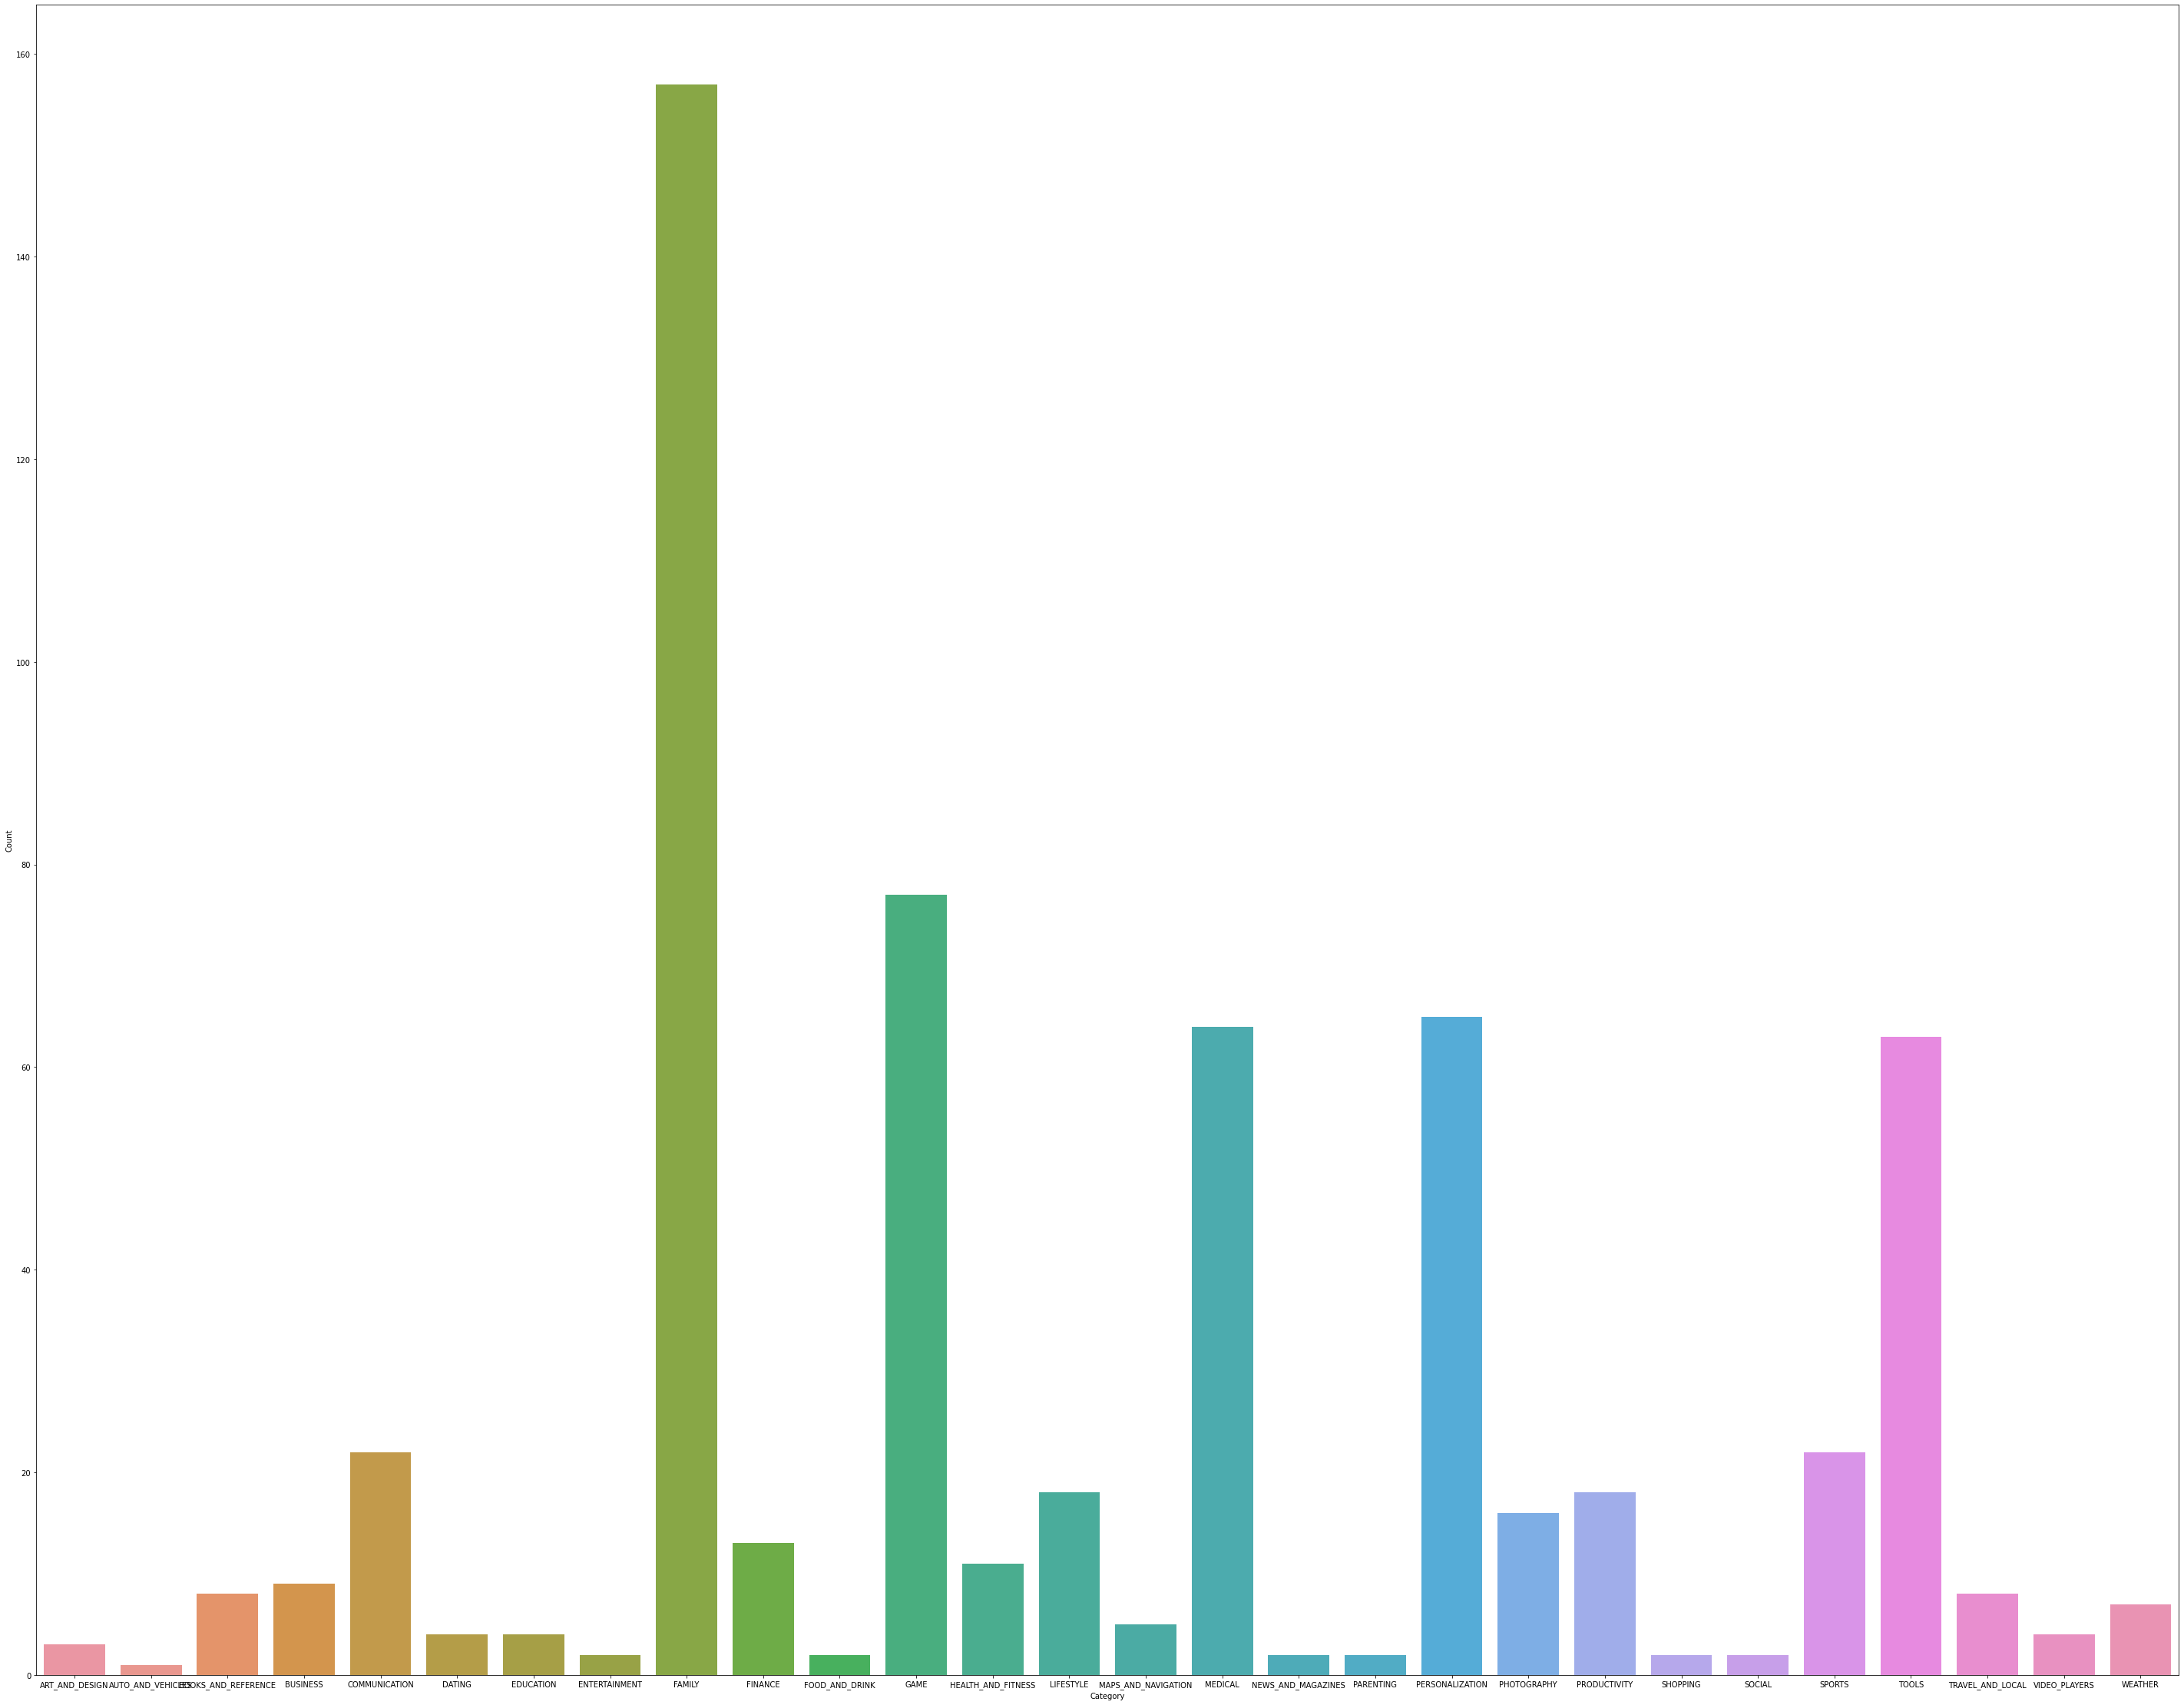

In [24]:
### Grouping the paid apps by category 
gpaidapps_cat=pd.DataFrame(gapp_paidapps.groupby('Category').size(),columns=['Count'])

plt.figure(figsize=(50,40))
sb.barplot(data=gpaidapps_cat,x=gpaidapps_cat.index,y='Count',)
plt.show()

#### from this barchart, i could see family category had most number of apps followed by Games, Medical, Personalization and Tools

In [25]:
#### let's study the sales vs the categories 

g_cate_paid=gapp_paidapps.groupby('Category').aggregate({'Total Sales':'sum'})
g_cate_paid['Total Sales']= g_cate_paid['Total Sales'].astype('float')
g_cate_paid.sort_values(inplace=True,by='Total Sales',ascending=False)

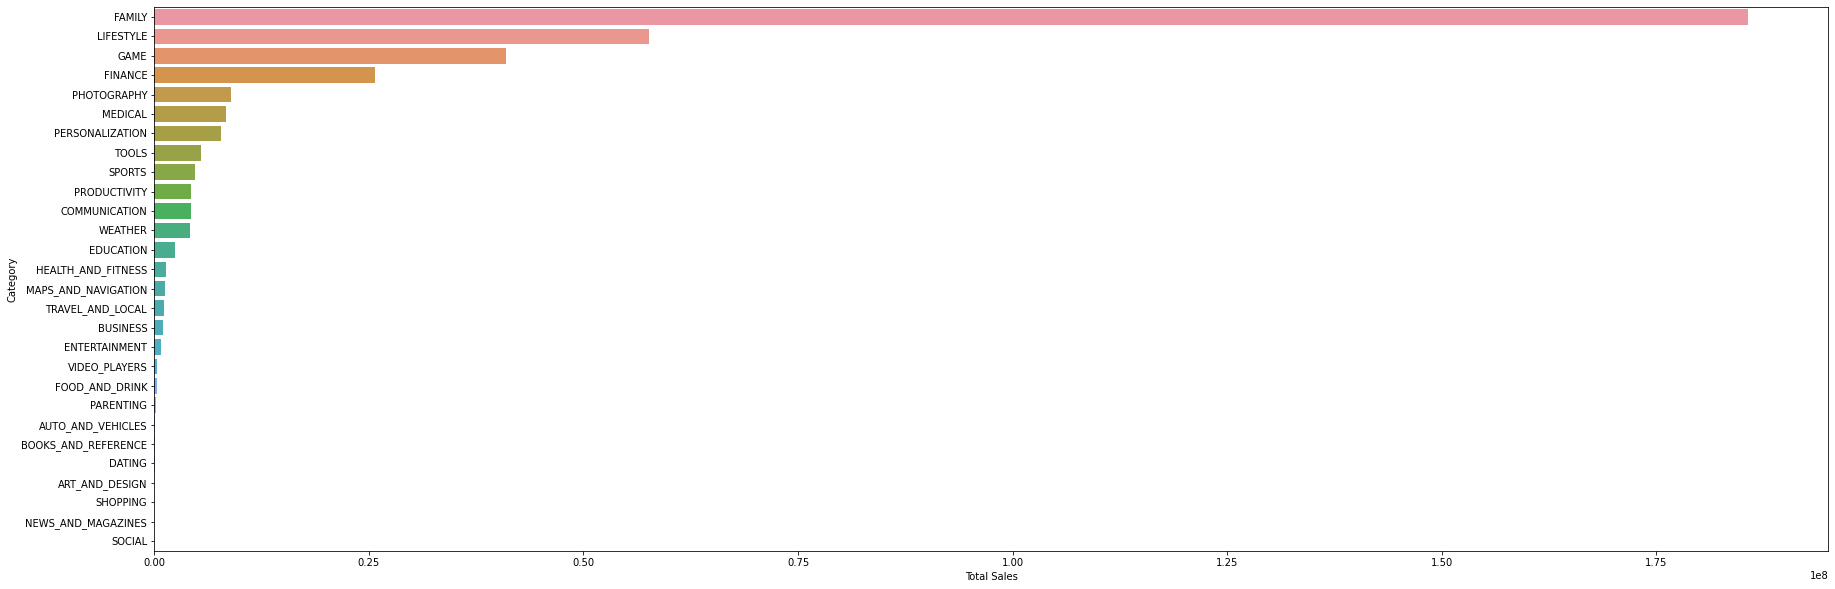

In [26]:
#### plotting sales by category

plt.figure(figsize=(30,10))
sb.barplot(data=g_cate_paid,y=g_cate_paid.index,x=g_cate_paid['Total Sales'])
plt.show()

#### Total Sales is higher for family category for paid apps. Let's now see genere under which family category had most sales

In [27]:
gapp_paidfamily= gapp_paidapps[gapp_paidapps['Category']=='FAMILY']
df1=gapp_paidfamily.groupby('Genres').aggregate({'Total Sales':'sum'}).sort_values(by='Total Sales',ascending=False)

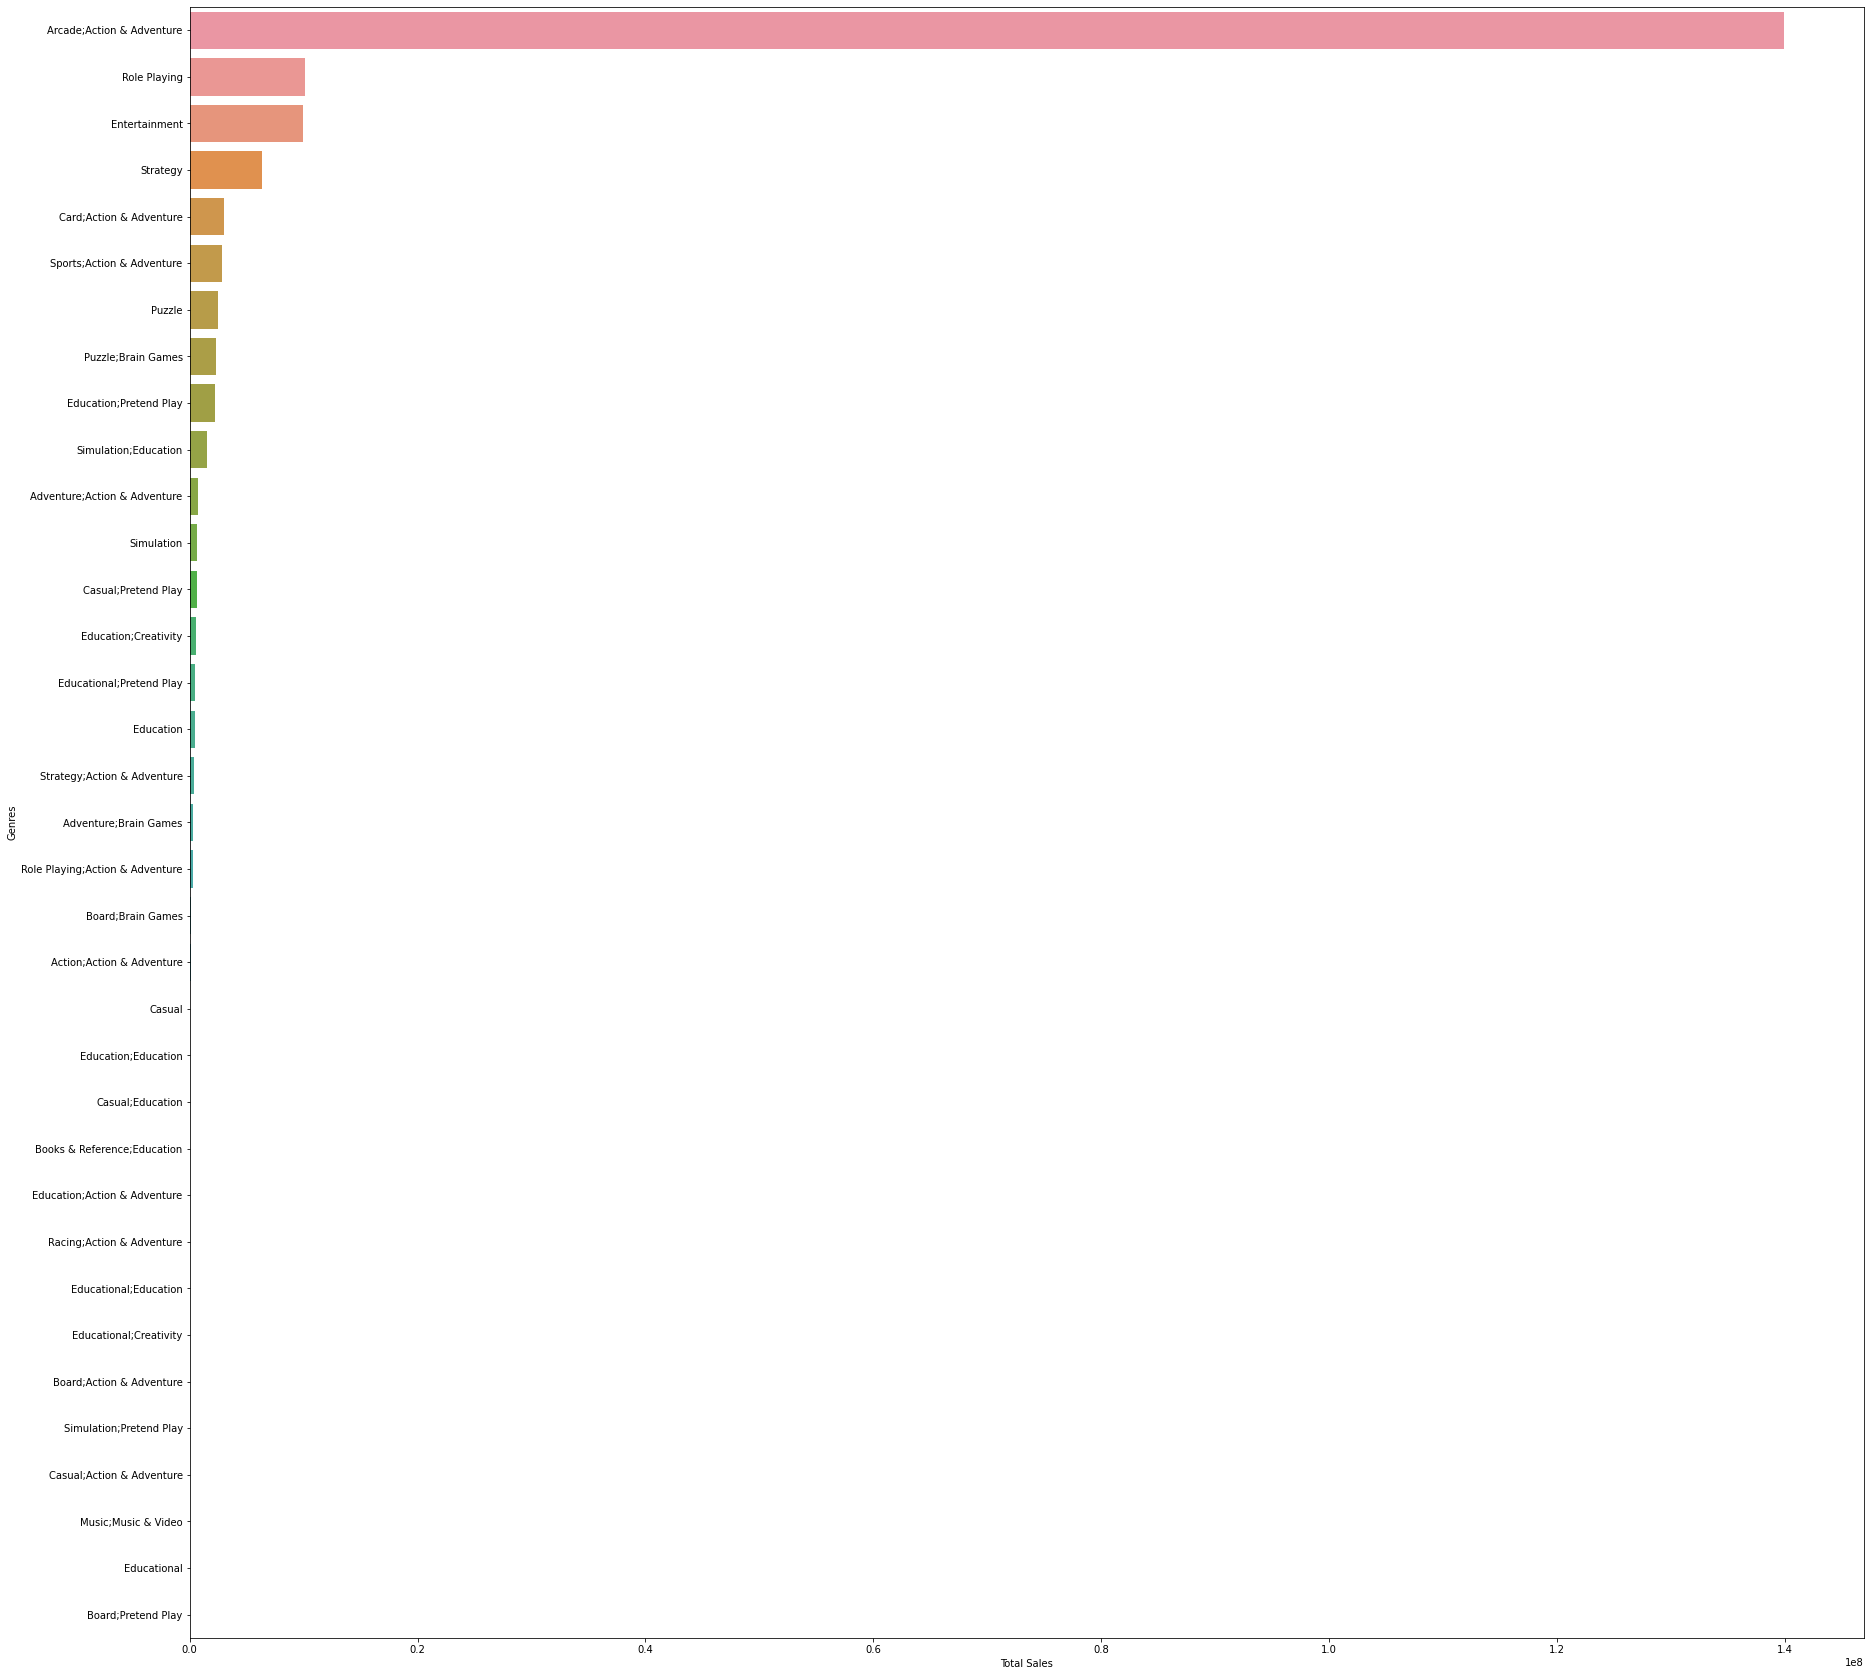

In [28]:
plt.figure(figsize=(30,30))
sb.barplot(data=df1,y=df1.index,x=df1['Total Sales'])
plt.show()

#### From this analysis , i could understand that most genres in family category are games among which arcade, action and adventure had more sales.

#### This is something correlating with the total installs which had been found in games category. Under games category , action arcade action and adventure had highest installs

In [29]:
gapp_paid_games= gapp_paidapps[gapp_paidapps['Category']=='GAME']
df1=gapp_paid_games.groupby('Genres').aggregate({'Total Sales':'sum'}).sort_values(by='Total Sales',ascending=False)

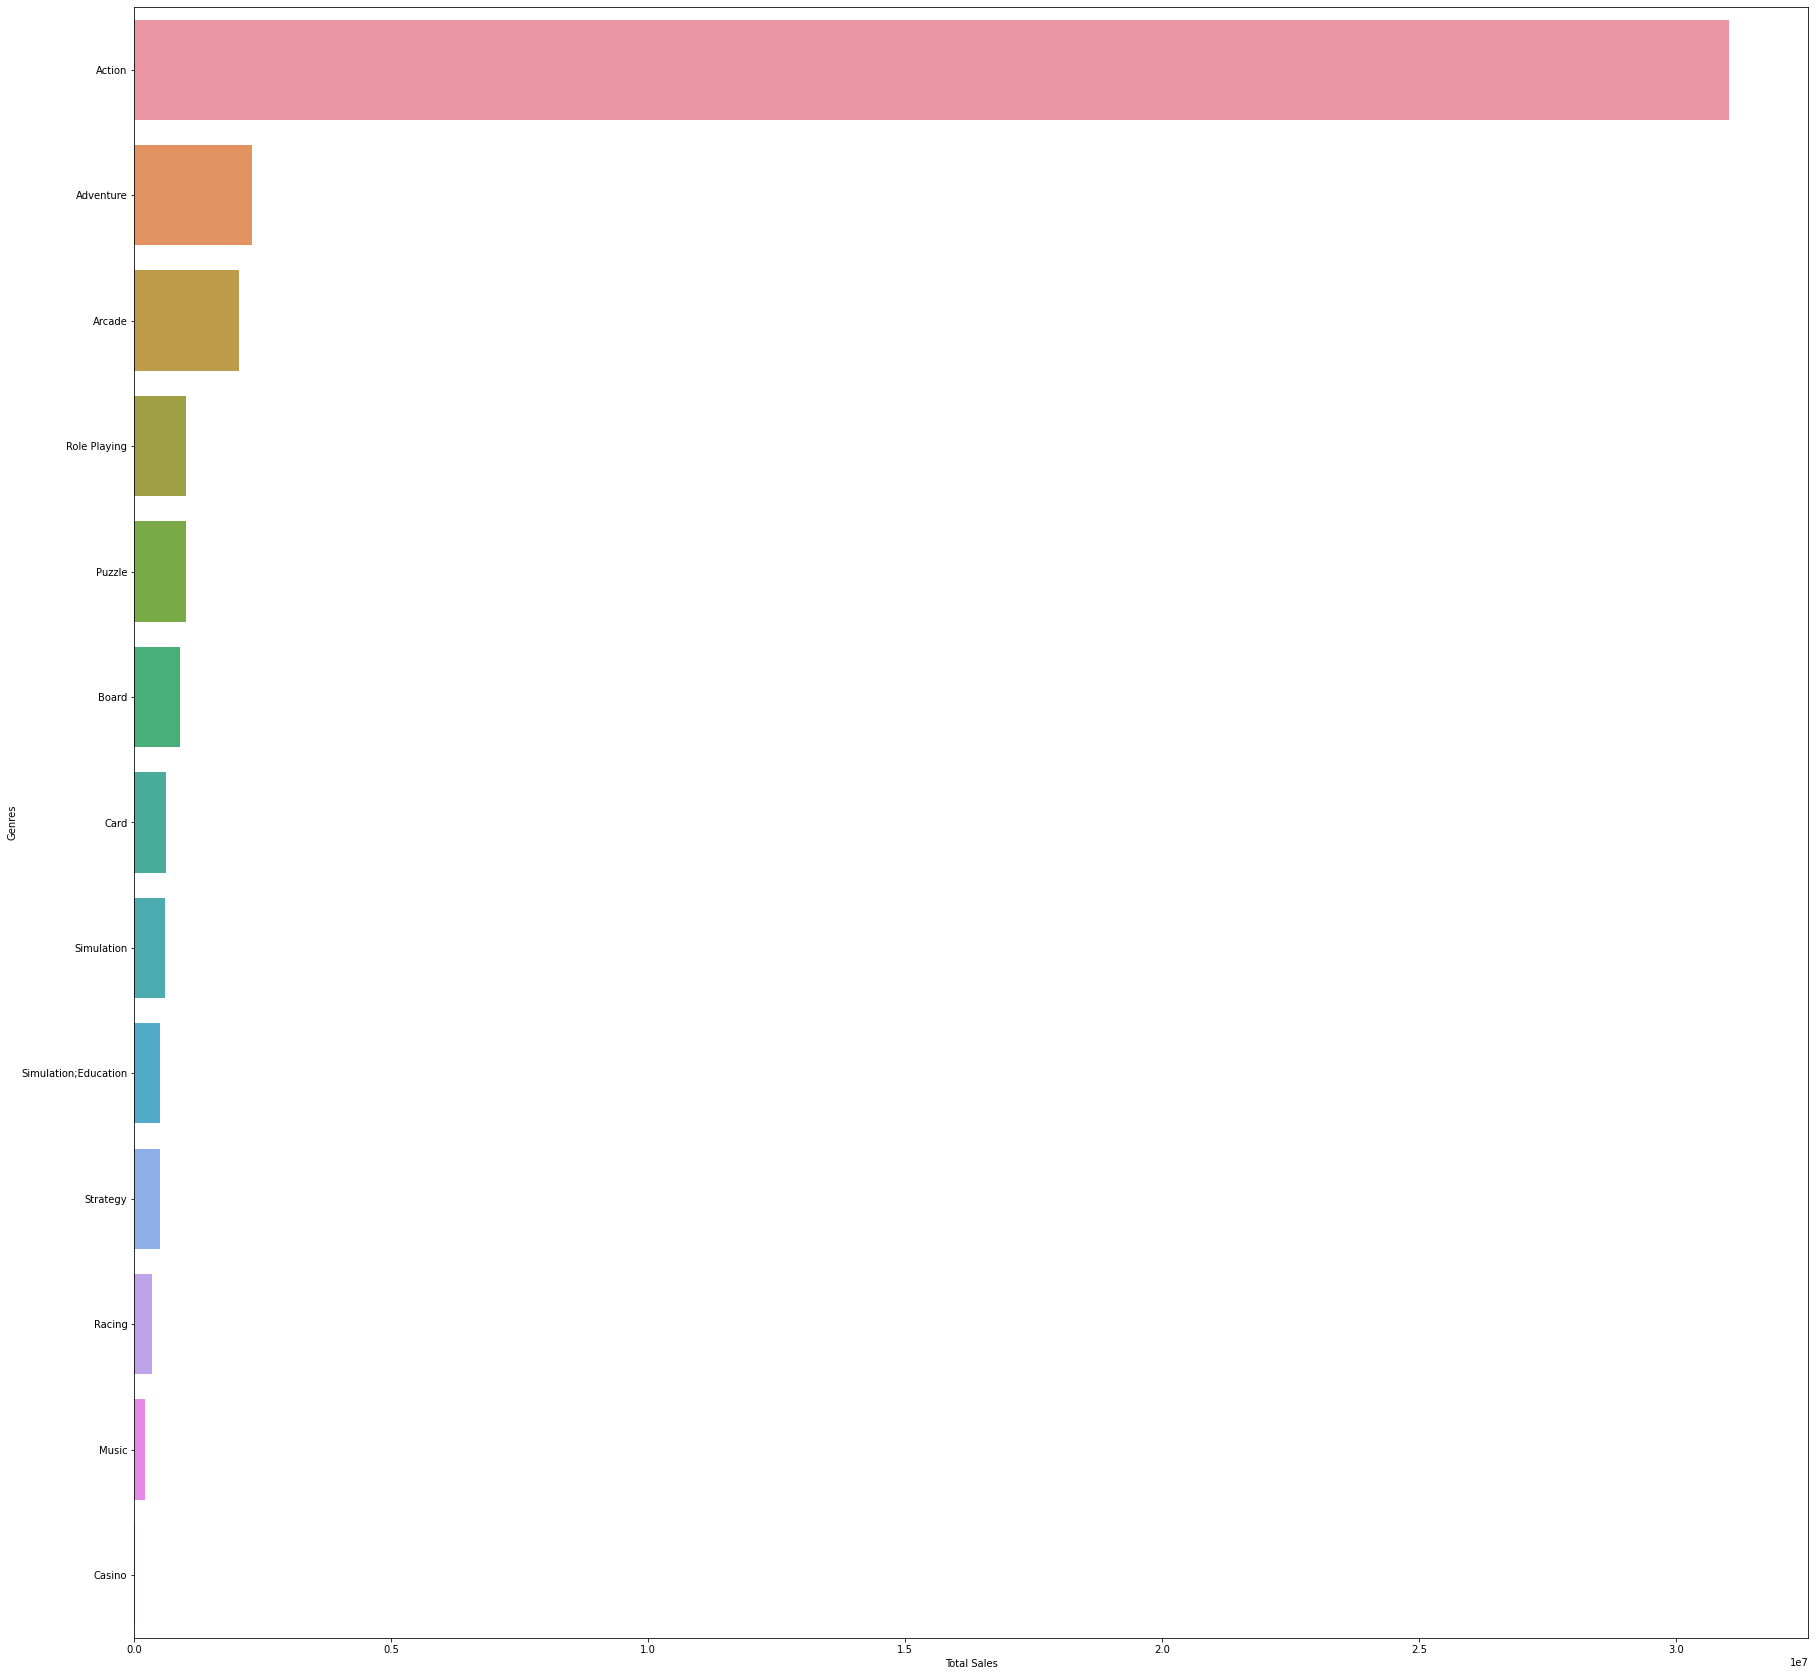

In [30]:
####studying Game Genres vs Total Sales
plt.figure(figsize=(30,30))
sb.barplot(data=df1,y=df1.index,x=df1['Total Sales'])
plt.show()

#### From this i could say that among games paid apps categories, more sales are done on the side of Action genres followed by adventure genres. This is quite interesting as when looked into every cases action & adeventures seems to be the category which people likes most....................

#### Almost the genres coming under the family are under the category of games itself.

<AxesSubplot:ylabel='Last Updated Year'>

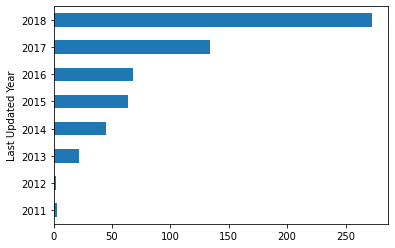

In [31]:
#### let's take the count of number of apps and their updated respective year, as more recent updated year is then we could say app is most engaging or it is being ensured that latest security patches had been updated to make the app more secure and protect the devices as well.

df1= pd.DataFrame(gapp_paidapps.groupby('Last Updated Year').size(),columns=['Count of apps'])

df1['Count of apps'].plot(kind='barh')

#### Study with this graph reveals that as of this dataset is updated on Feb 2019, so it is good to see most apps are updated recently.

### Studying the FINANCE category apps (from gapps_data df)

In [32]:
finance_apps= gapps_data[gapps_data['Category']=='FINANCE']
finance_apps

,App,Category,Rating,Reviews,Size (in MB),Installs (More than or equal to),Type,Price,Content Rating,Genres,Android Ver,Last Updated Year
1050,Citibanamex Movil,FINANCE,3.6,52306,42,5000000,Free,0.0,Everyone,Finance,5.0 and up,2018
1052,KTB Netbank,FINANCE,3.8,42644,19,5000000,Free,0.0,Everyone,Finance,4.2 and up,2018
1053,Mobile Bancomer,FINANCE,4.2,278082,70,10000000,Free,0.0,Everyone,Finance,4.0.3 and up,2018
1054,Nedbank Money,FINANCE,4.2,6076,32,500000,Free,0.0,Everyone,Finance,4.2 and up,2018
1055,SCB EASY,FINANCE,4.2,112656,93,5000000,Free,0.0,Everyone,Finance,4.1 and up,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
7930,MYCU TX Mobile Banking,FINANCE,3.0,4,-1,100,Free,0.0,Everyone,Finance,Varies with device,2018
9839,"Moneycontrol – Stocks, Sensex, Mutual Funds, IPO",FINANCE,4.4,281635,-1,5000000,Free,0.0,Everyone,Finance,Varies with device,2018
9840,CNBC: Breaking Business News & Live Market Data,FINANCE,4.2,24666,-1,1000000,Free,0.0,Everyone,Finance,Varies with device,2018
10048,Money Manager Ex for Android,FINANCE,4.2,2695,-1,100000,Free,0.0,Everyone,Finance,Varies with device,2018


In [33]:
finance_apps['Last Updated Year'].unique()

array([2018, 2017, 2016, 2015, 2013, 2012])

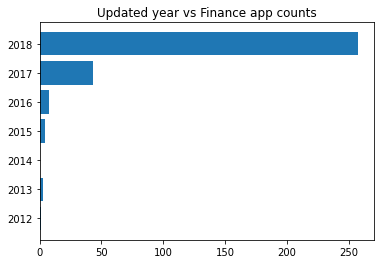

In [34]:
#### studying the latest updated year with respect to app counts

plt.title('Updated year vs Finance app counts')
df1= pd.DataFrame(finance_apps.groupby('Last Updated Year').size(),columns=['Count'])
plt.barh(width=df1['Count'],y=df1.index)
plt.show()

#### from seeing this graph, almost most finance apps are getting updated recently


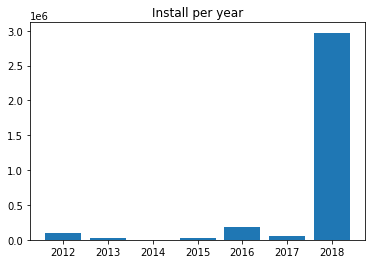

In [35]:
averagerating_year=[]
average_installs=[]
for year in list(finance_apps['Last Updated Year'].unique()):
    averagerating_year.append(finance_apps[finance_apps['Last Updated Year']==year]['Rating'].mean())
    average_installs.append(finance_apps[finance_apps['Last Updated Year']==year]['Installs (More than or equal to)'].mean())


### plotting the average installs and average rating with respect to year updated.

plt.bar(height=average_installs,x=list(finance_apps['Last Updated Year'].unique()),label='Average Installs')
plt.title('Install per year')
plt.show()



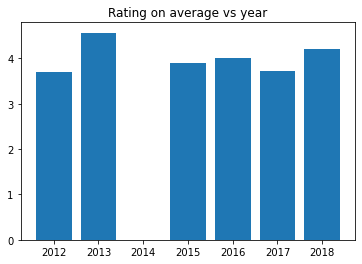

In [36]:
plt.bar(height=averagerating_year,x=list(finance_apps['Last Updated Year'].unique()),label='Average Rating')
plt.title('Rating on average vs year')
plt.show()

#### from this two graphs it gives an insight that in regards to installs , people are downloading finance apps which are updated recently as this would be sure it had good features and good security updates 

#### Study with respect to rating in apps

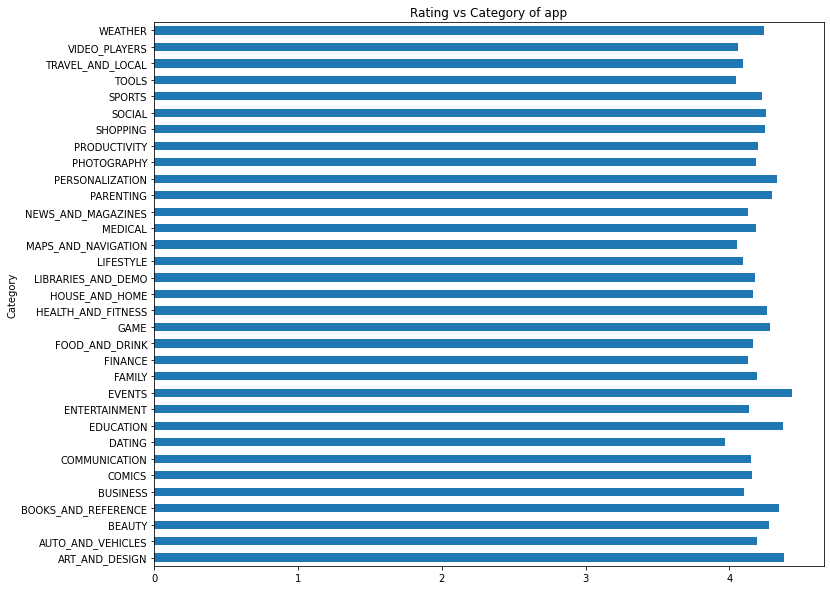

In [37]:
df= gapps_data.groupby('Category').aggregate({'Rating':'mean'})

plt.figure(figsize=(12,10))
plt.title('Rating vs Category of app')
df['Rating'].plot(kind='barh')
plt.show()

##### rating seems to almost good for every category of apps

#### Study the updated year with respect to total numbers of apps updated for that year as per latest

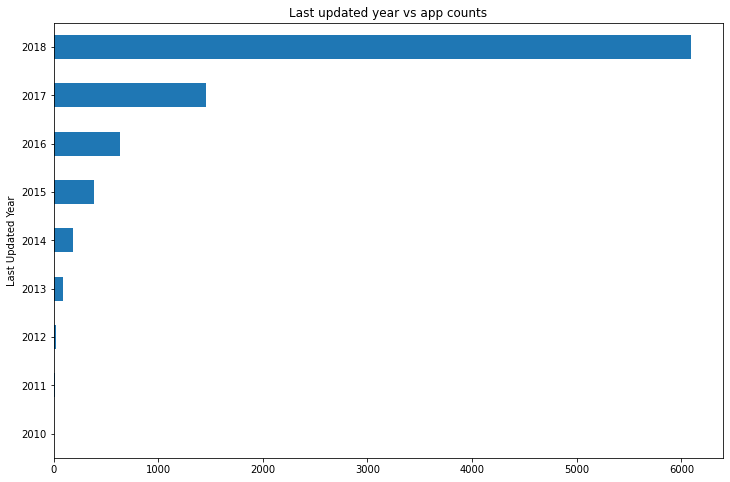

In [38]:
df= pd.DataFrame(gapps_data.groupby('Last Updated Year').size(),columns=['Count'])
plt.figure(figsize=(12,8))
plt.title('Last updated year vs app counts')
df['Count'].plot(kind='barh')
plt.show()

#### From this graph we could say almost all apps are updated latest (considering the date from which this dataset was scrapped)

#### This gives an idea that apps are updated, which means they are active and more secure.

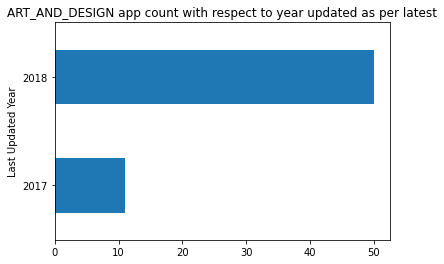

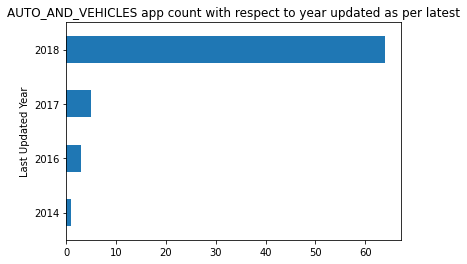

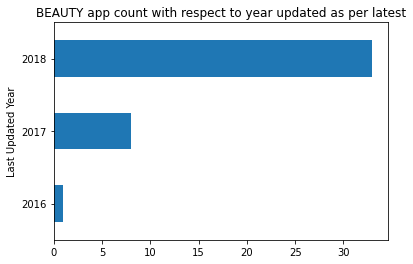

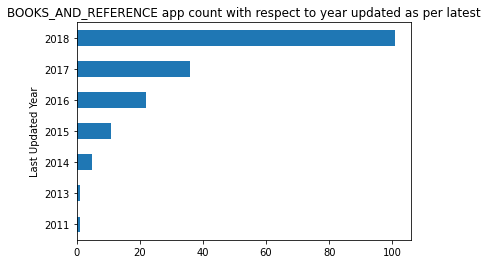

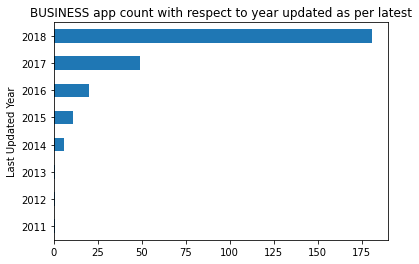

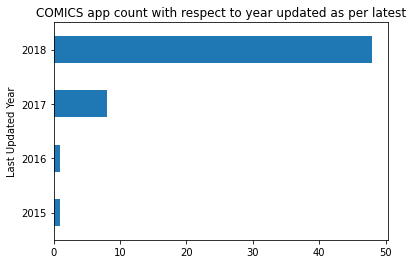

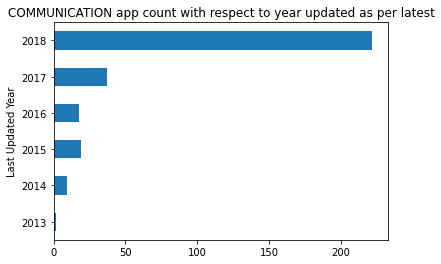

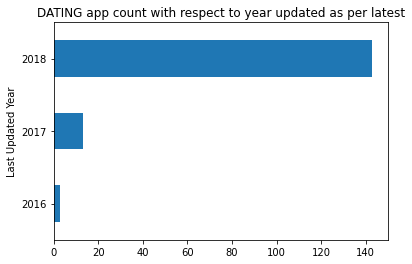

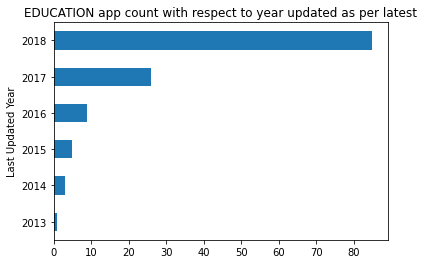

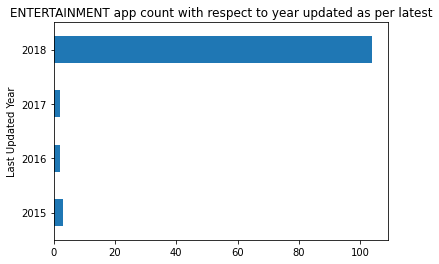

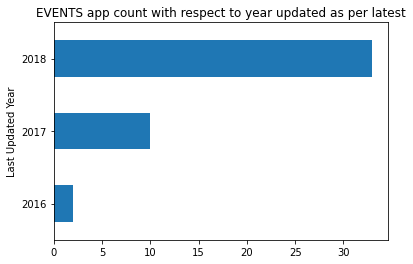

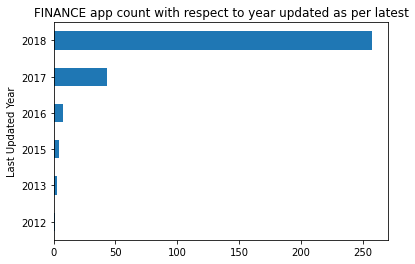

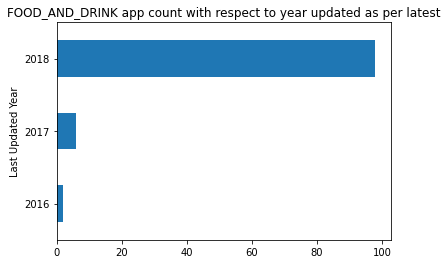

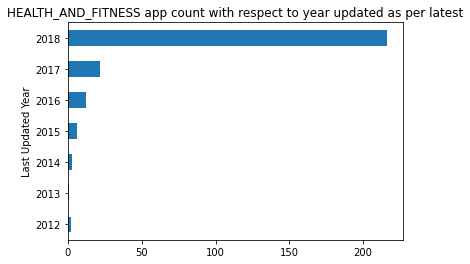

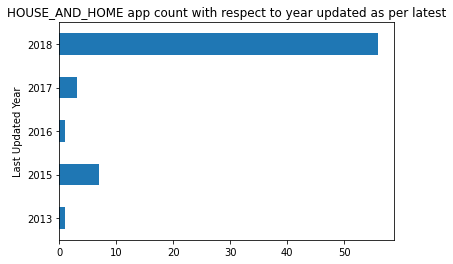

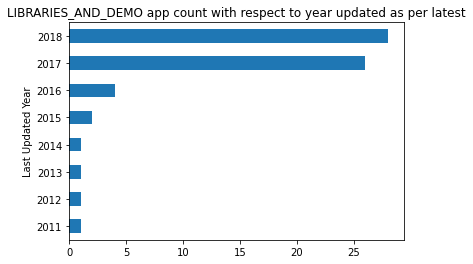

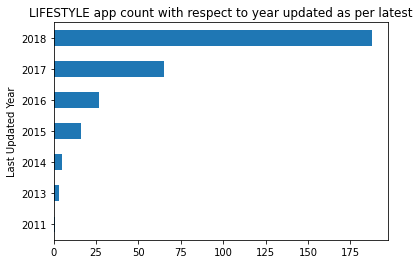

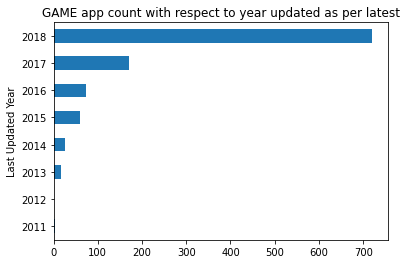

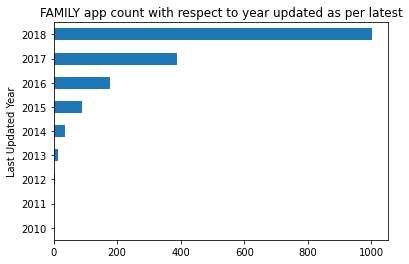

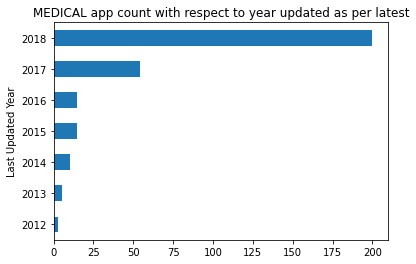

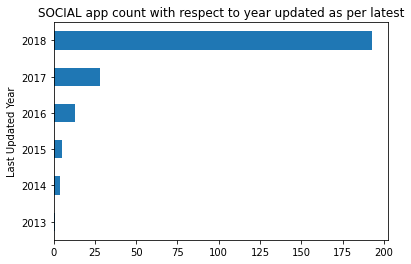

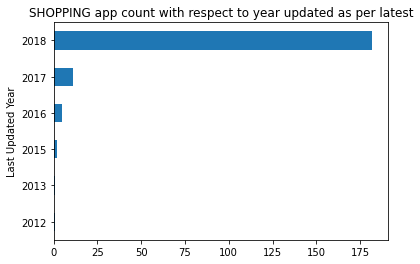

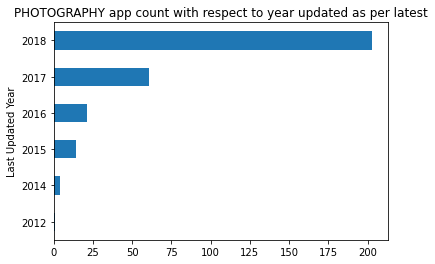

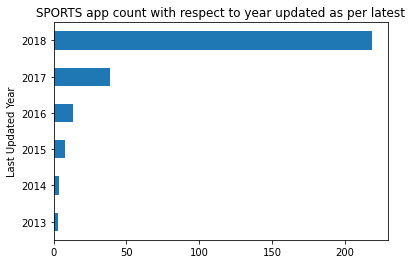

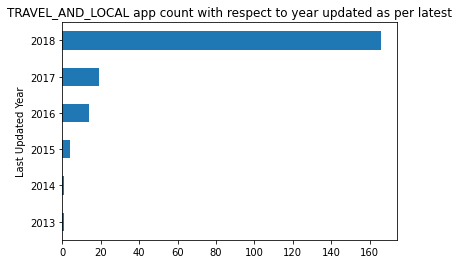

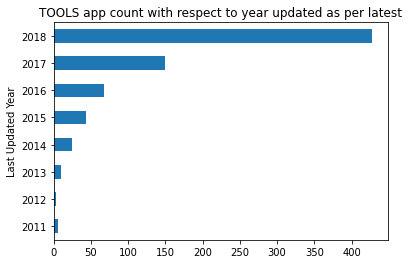

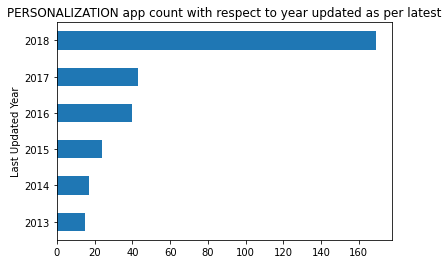

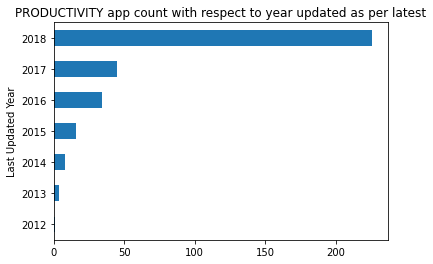

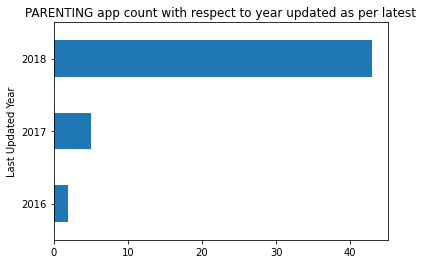

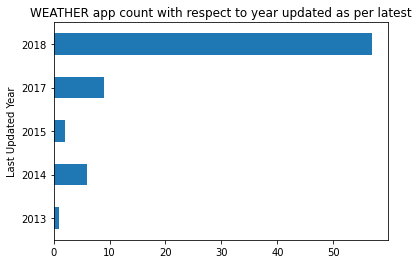

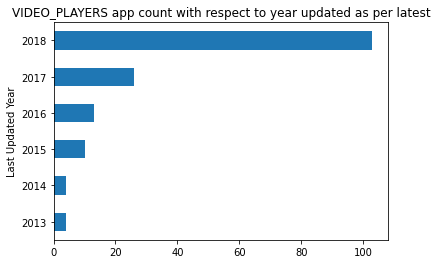

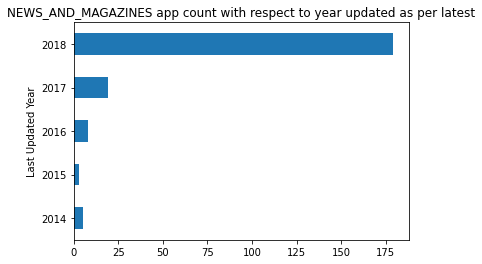

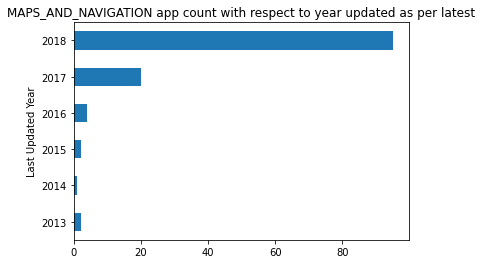

In [39]:
for category in list(gapps_data['Category'].unique()):
    df1= pd.DataFrame(gapps_data[gapps_data['Category']==category].groupby('Last Updated Year').size(),columns=['Count'])
    plt.title(f'{category} app count with respect to year updated as per latest')
    df1['Count'].plot(kind='barh')
    plt.show()
    

### All categories app are being recently updated and are still active in market as per the information obtained from graph.

### Studying with respect to Andriod Versions

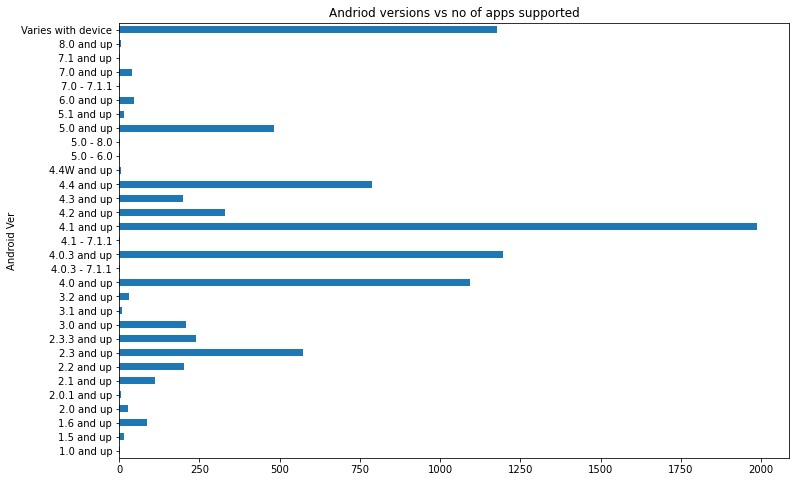

In [40]:
df_andriod= pd.DataFrame(gapps_data.groupby('Android Ver').size(),columns=['Count'])
plt.figure(figsize=(12,8))
plt.title('Andriod versions vs no of apps supported')
df_andriod['Count'].plot(kind='barh')
plt.show()

#### from the general wise, when i was studying the apps with respect to the andriod version, i could see most apps requires a minimum andriod version of 4.1 and above 

#### Also andriod version 8 and above was less as the andriod version 8 was latest one during that time 

#### let's study the same thing category wise

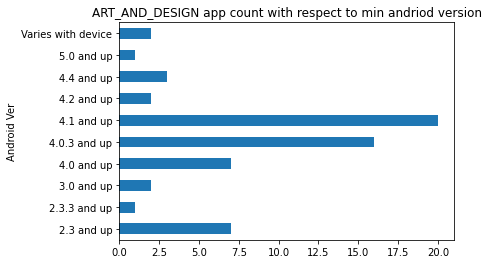

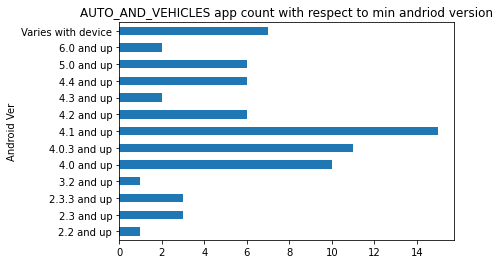

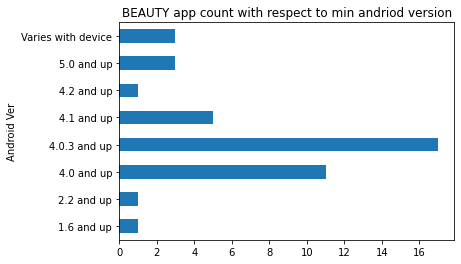

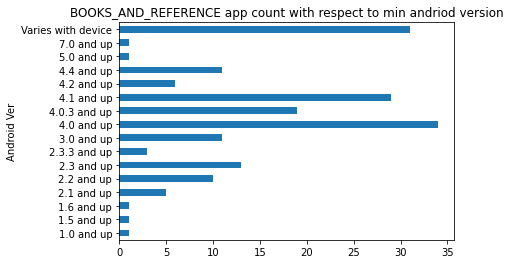

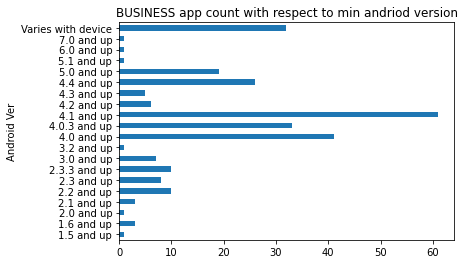

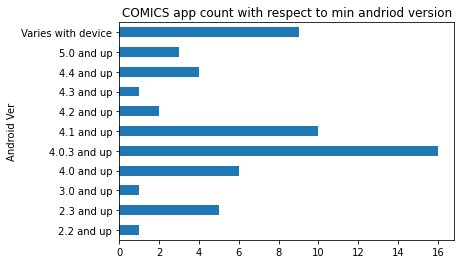

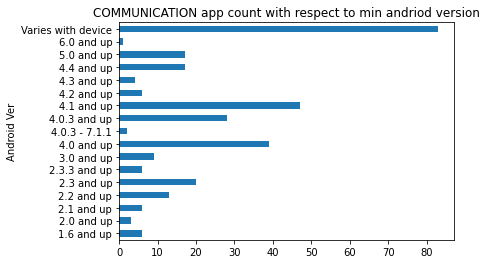

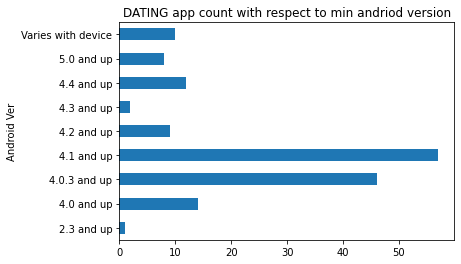

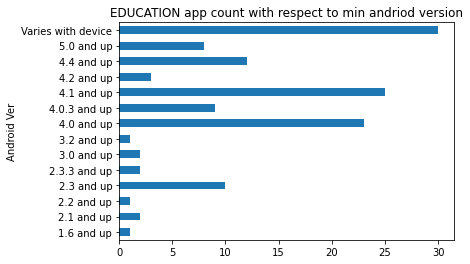

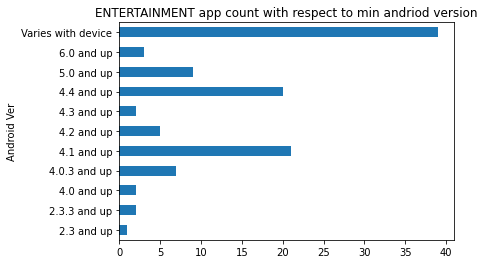

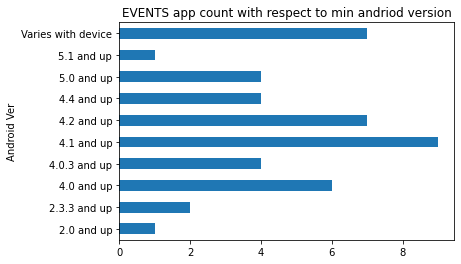

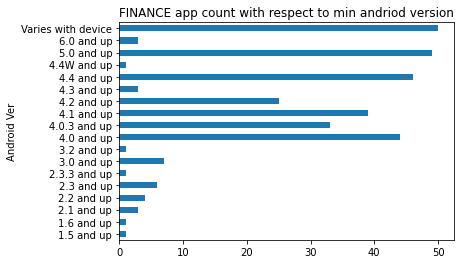

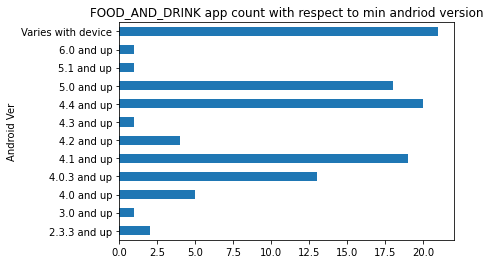

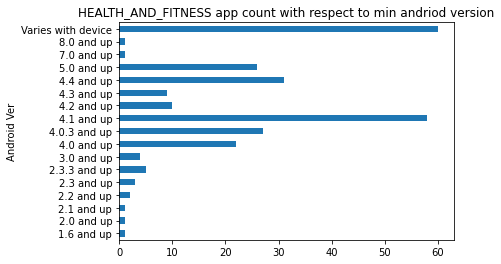

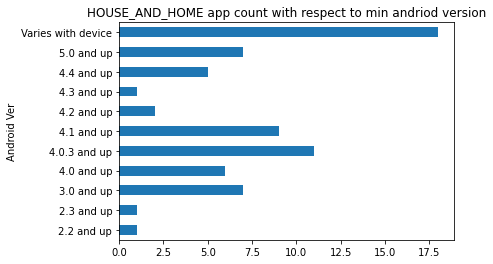

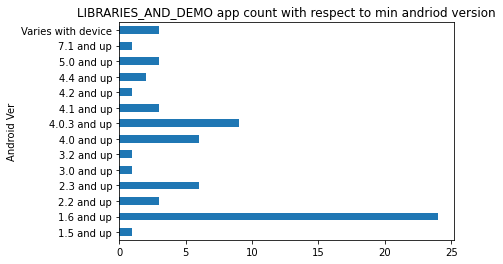

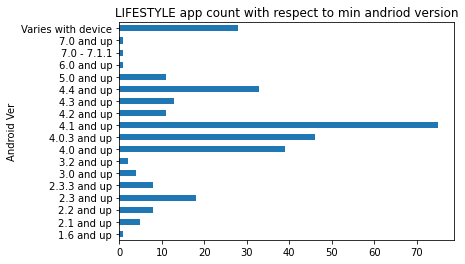

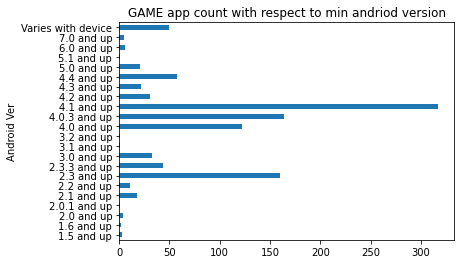

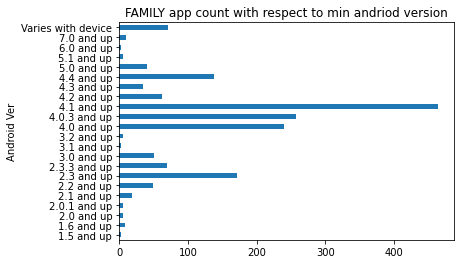

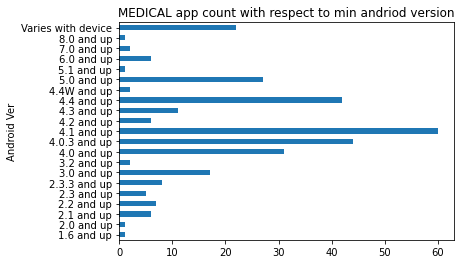

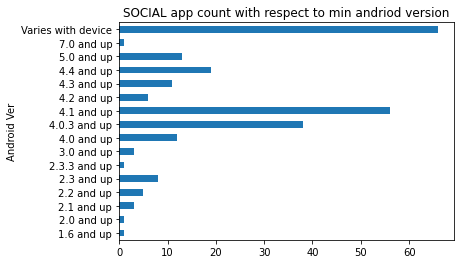

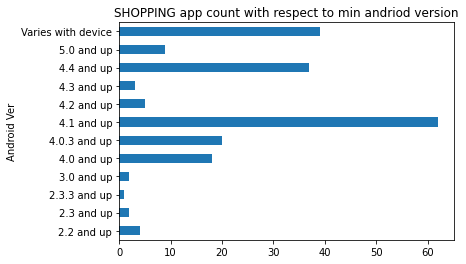

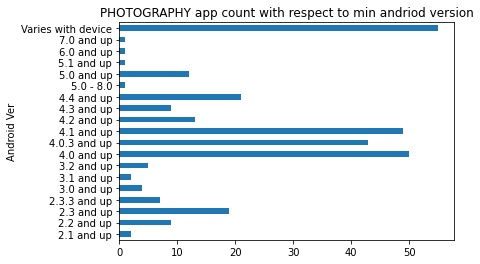

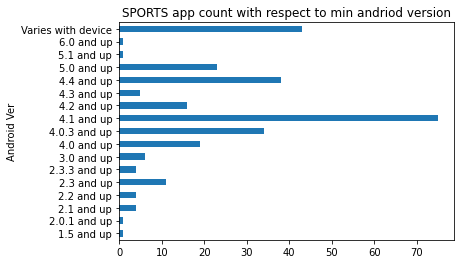

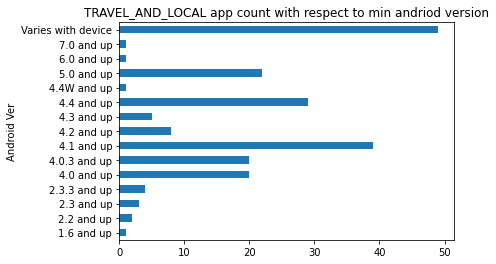

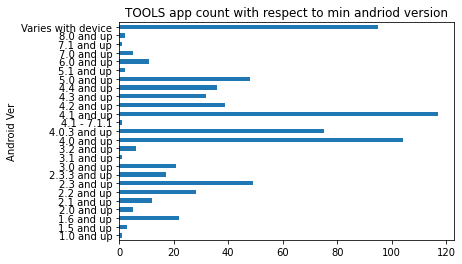

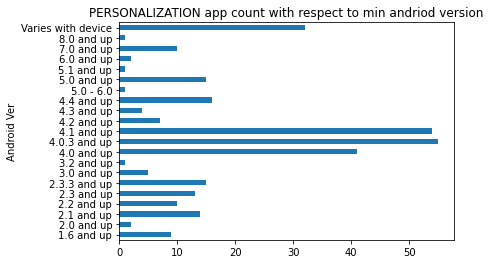

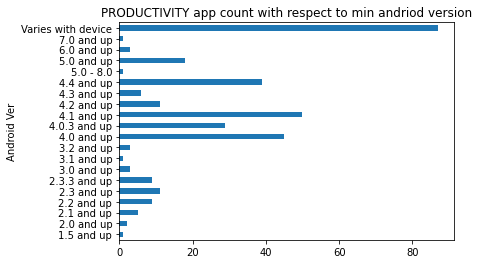

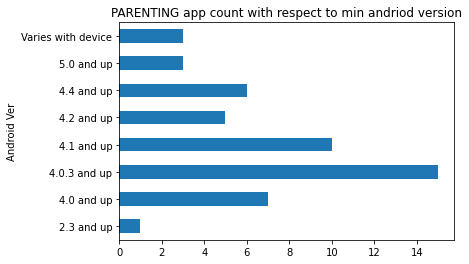

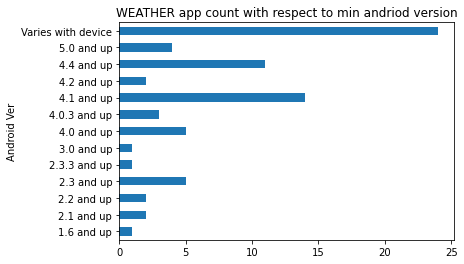

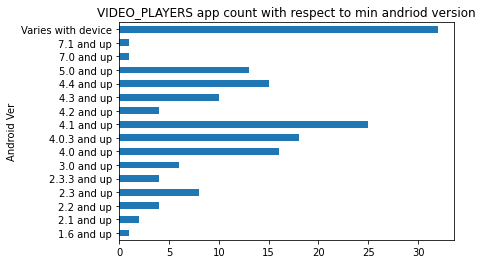

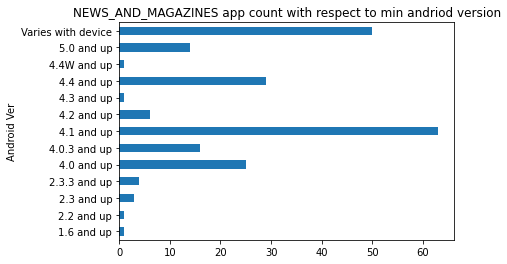

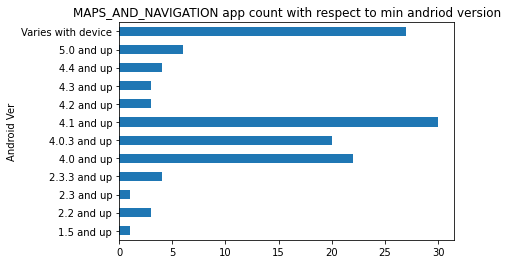

In [41]:
for category in list(gapps_data['Category'].unique()):
    df1= pd.DataFrame(gapps_data[gapps_data['Category']==category].groupby('Android Ver').size(),columns=['Count'])
    plt.title(f'{category} app count with respect to min andriod version')
    df1['Count'].plot(kind='barh')
    plt.show()

#### Analysis from this graph:

#### 1. Most applications on category wise support andriod 4 and above (like 4.0,4.03,4.1 etc)

#### 2. Most apps on category basis andriod version which varies from device to device (example: communication,education,social etc)

#### 3. Libraries and demo category , most apps under it support andriod version 1.6 and above

#### 4. Finance category apps support minimum andriod version of 5.0 and above, may it is due installing apps under devices with latest andriod may have good security.

## This is study which i had done on the google play store apps. 